In [ ]:
try:
    import gmsh
except ImportError:
    !wget "https://github.com/fem-on-colab/fem-on-colab.github.io/raw/75de0a3/releases/gmsh-install.sh" -O "/tmp/gmsh-install.sh" && bash "/tmp/gmsh-install.sh"
    import gmsh

try:
    import dolfinx
except ImportError:
  !wget "https://github.com/fem-on-colab/fem-on-colab.github.io/raw/75de0a3/releases/fenicsx-install-real.sh" -O "/tmp/fenicsx-install.sh" && bash "/tmp/fenicsx-install.sh"
  import dolfinx

try:
    import pyvista
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/vtk-install.sh" -O "/tmp/vtk-install.sh" && bash "/tmp/vtk-install.sh"
    import pyvista

try:
  import eitx
except ImportError:
  !wget https://raw.githubusercontent.com/felipekriffel/EITCNN/main/eitx.py
  import eitx

pyvista.set_jupyter_backend("static")

from google.colab import drive
drive.mount('/content/drive')

--2024-08-16 15:34:41--  https://github.com/fem-on-colab/fem-on-colab.github.io/raw/75de0a3/releases/gmsh-install.sh
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fem-on-colab/fem-on-colab.github.io/75de0a39f3a1cf2b22bdf80ab49832fea02b7d96/releases/gmsh-install.sh [following]
--2024-08-16 15:34:41--  https://raw.githubusercontent.com/fem-on-colab/fem-on-colab.github.io/75de0a39f3a1cf2b22bdf80ab49832fea02b7d96/releases/gmsh-install.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3495 (3.4K) [text/plain]
Saving to: ‘/tmp/gmsh-install.sh’

/tmp/gmsh-install.s 100%[===================>]   3.41K

In [ ]:
FILEPATH = '/content/drive/MyDrive/EITCNN/'

In [ ]:
'Load files'

from google.colab import files

#Loading datamat
!wget https://github.com/HafemannE/FEIT_CBM34/raw/main/CBM/chapter5/section2/datamat/datamat_1_0.mat
!wget https://github.com/HafemannE/FEIT_CBM34/raw/main/CBM/chapter5/section2/datamat/datamat_1_1.mat
!wget https://github.com/HafemannE/FEIT_CBM34/raw/main/CBM/chapter5/section2/datamat/datamat_1_2.mat
!wget https://github.com/HafemannE/FEIT_CBM34/raw/main/CBM/chapter5/section2/datamat/datamat_1_3.mat
!wget https://github.com/HafemannE/FEIT_CBM34/raw/main/CBM/chapter5/section2/datamat/datamat_1_4.mat
!wget https://github.com/HafemannE/FEIT_CBM34/raw/main/CBM/chapter5/section2/datamat/datamat_2_3.mat
!wget https://github.com/HafemannE/FEIT_CBM34/raw/main/CBM/chapter5/section2/datamat/datamat_2_5.mat
!wget https://github.com/HafemannE/FEIT_CBM34/raw/main/CBM/chapter5/section2/datamat/datamat_2_6.mat
!wget https://github.com/HafemannE/FEIT_CBM34/raw/main/CBM/chapter5/section2/datamat/datamat_3_4.mat
!wget https://github.com/HafemannE/FEIT_CBM34/raw/main/CBM/chapter5/section2/datamat/datamat_3_5.mat

--2024-08-16 15:36:41--  https://github.com/HafemannE/FEIT_CBM34/raw/main/CBM/chapter5/section2/datamat/datamat_1_0.mat
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HafemannE/FEIT_CBM34/main/CBM/chapter5/section2/datamat/datamat_1_0.mat [following]
--2024-08-16 15:36:42--  https://raw.githubusercontent.com/HafemannE/FEIT_CBM34/main/CBM/chapter5/section2/datamat/datamat_1_0.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10123 (9.9K) [application/octet-stream]
Saving to: ‘datamat_1_0.mat’

datamat_1_0.mat     100%[===================>]   9.89K  --.-KB/s    in 0s      

2024-08-16 15:36:42 

In [ ]:
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import scipy

print('Please, upload images of Phantoms')
# uploaded = files.upload()
#img = np.asarray(Image.open('fantom_1_2.jpg'))
# plt.imshow(img)

Please, upload images of Phantoms


(15, 16)


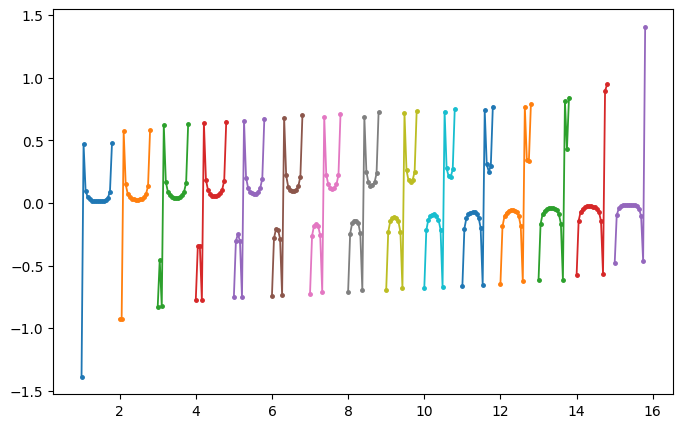

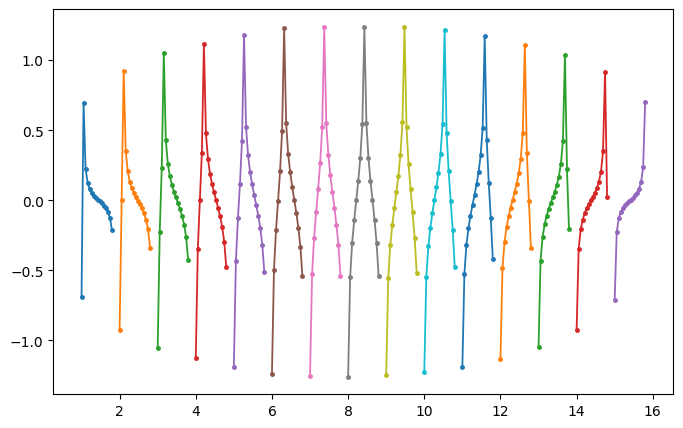

In [ ]:
#Load data of background
mat = scipy.io.loadmat("datamat_1_0")
Uel=mat.get("Uel").T
CP=mat.get("CurrentPattern").T

#Selecting Potentials
Uel_b=Uel[-15:] #Matrix of measuarements
print(Uel_b.shape)

#Plot
fig, ax = plt.subplots(figsize=(8,5))
for i, U_vec in enumerate(Uel_b):
    x=np.linspace(1,1.8,16)+i
    ax.plot(x,U_vec, linewidth=1.3, marker='.', markersize=5);

#Selecting Potentials
list_U0_m=np.zeros_like(Uel_b)

#Convert type of data
for index, potential in enumerate(Uel_b):
    list_U0_m[index]=eitx.ConvertingData(potential, method="KIT4")
list_U0=list_U0_m.flatten() #Matrix to vector

#Plot
fig, ax = plt.subplots(figsize=(8,5))
for i, U_vec in enumerate(list_U0_m):
    x=np.linspace(1,1.8,16)+i
    ax.plot(x,U_vec, linewidth=1.3, marker='.', markersize=5);


#Current
I_all=CP[-15:]/np.sqrt(2)
l, L=np.shape(I_all) #Number of experiments = 15, Number of Electrodes = 16

# print(I_all)

In [ ]:
# # MESH (For real data)
# "Basic Definitions"
# radius = 14                       #Circle radius
# L = 16                            #Number of Electrodes
# per_cober = 0.454728409           #Percentage of area covered by electrodes
# rotate = (pi/2-0.0892857143183109)  #Rotation
# rotate = 0
# # Return object with angular position of each electrode
# ele_pos = electrodes_position(L, per_cober, rotate, anticlockwise=False)

"Basic Definitions"
radius=1       #Circle radius
# L=16           #Number of Electrodes
per_cober=0.5  #Percentage of area covered by electrodes
rotate= 0      #Electrodes Rotation

'Return object with angular position of each electrode'
ele_pos = eitx.Electrodes(L, per_cober, rotate)
refine_n = 8     #Refinement mesh
n_in = 8         #Vertex on elec.
n_out = 2        #Vertex on gaps (Sometimes it is important.)

# CURRENT
'Basic Definitions'
# z_r=np.ones(L)*0.025E-3                         #Impedance of each electrode
z_r=np.ones(L)*0.07858
z = z_r

'Mesh'
# mesh_inverse=MyMesh(radius, refine_n, n_in, n_out, ele_pos)
mesh_object = eitx.MeshClass(ele_pos,0.4,0.6)
mesh = mesh_object.mesh

## Direct problem
dir_problem = eitx.DirectProblem(mesh_object,z)
V0 = dir_problem.V0   # Discontinuous Garlekin space function
V = dir_problem.V     # Continuous Garlekin space function


# l=L-1                                             #Number of experiments

# HOMOGENEUS MESH
N = 128               # grid with N*N points (works well with 0 < N < 400)
h = 2*radius/(N-1)    # step-size
x = [radius - i*h for i in range(N)]  # x grid points
y = [-radius + i*h for i in range(N)] # y grid points

# MESH x and y
mesh_x = np.zeros((N,N))                              # x-Data (input of CNN)
mesh_y = np.zeros((N,N))                              # y-Data (input of CNN)
for i in range(N):
  for j in range(N):
    mesh_x[i][j] = x[i]
    mesh_y[i][j] = y[j]

"Define sigma as constant = Background"
gamma0 = dolfinx.fem.Function(V0) #Define the function with basis DG
iv, bg= 10, 1.2
gamma0.x.array[:] = bg

(8, 128, 128, 17)


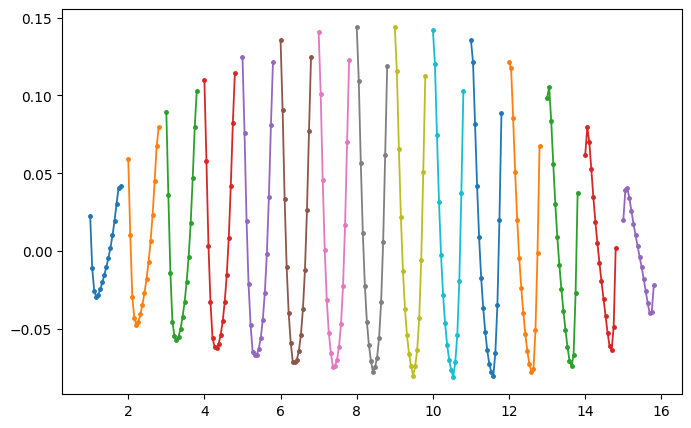

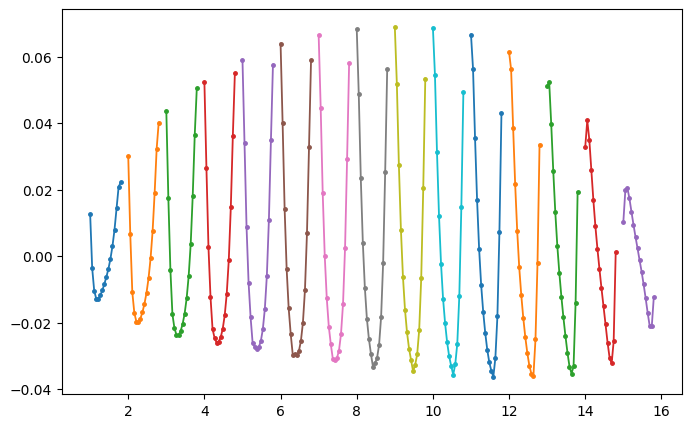

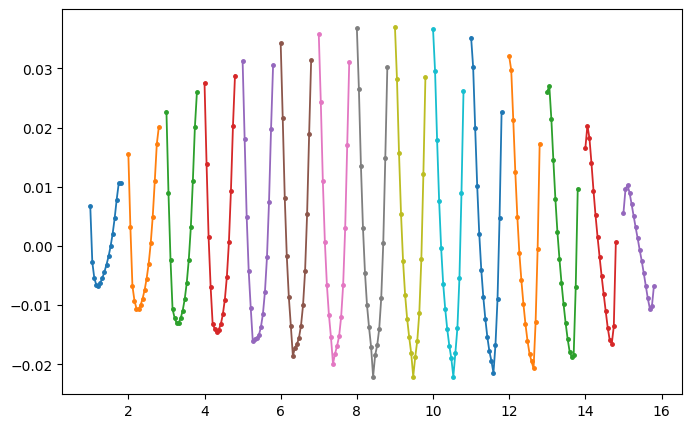

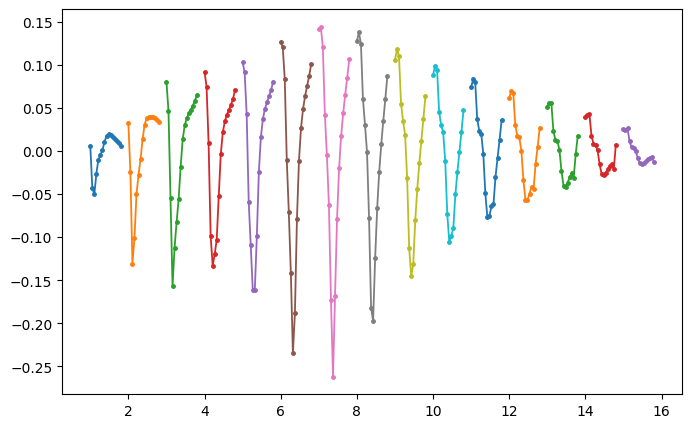

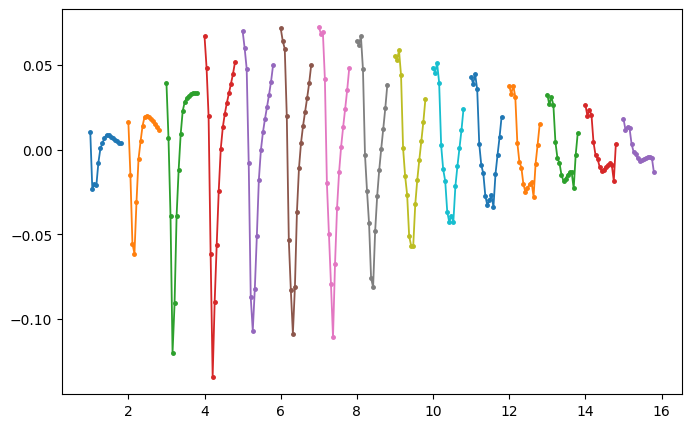

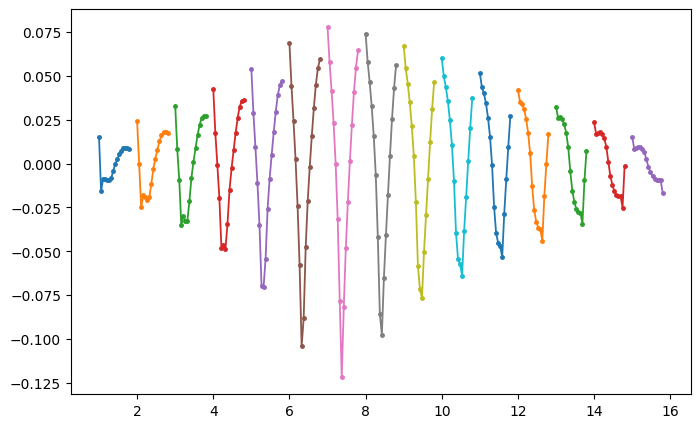

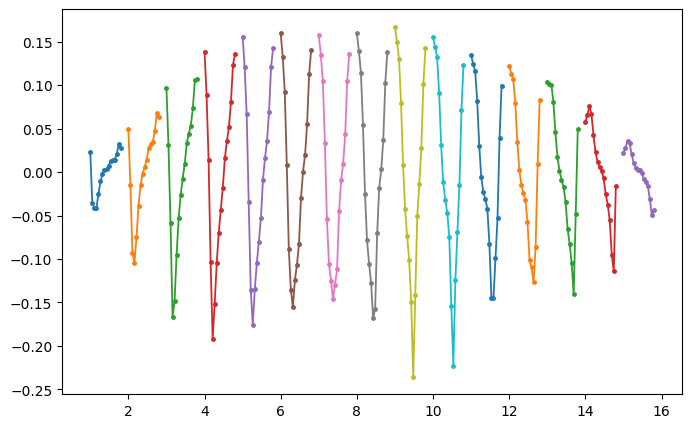

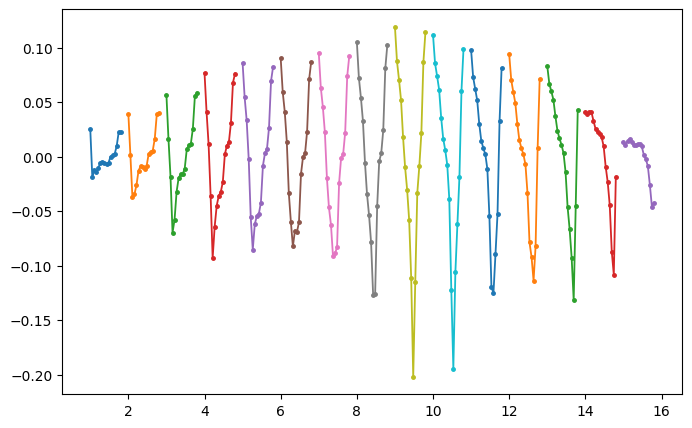

In [ ]:
import tensorflow as tf

# exper = ['1_2', '1_3', '1_4']    # experiments
#exper = ['1_2', '1_3', '1_4', '2_3', '2_5', '2_6']    # experiments
exper = ['1_2', '1_3', '1_4', '2_3', '2_5', '2_6', '3_4', '3_5']    # experiments
n_exper = len(exper)
# exper = 'datamat_1_2'

T1 = []
for sample in range(n_exper):
  #Load experimental data
  mat = scipy.io.loadmat('datamat_' + exper[sample])
  # mat = scipy.io.loadmat(exper)
  Uel=mat.get("Uel").T
  # CP=mat.get("CurrentPattern").T

  #Selecting Potentials
  Uel_f=Uel[-15:] #Matrix of measuarements

  #Selecting Potentials
  list_U1_m=np.zeros_like(Uel_f)

  #Convert type of data
  for index, potential in enumerate(Uel_f):
      list_U1_m[index]=eitx.ConvertingData(potential, method="KIT4")
  # list_U1=list_U1_m.flatten() #Matrix to vector

  # Difference of potential
  differ = [list_U1_m[k] - list_U0_m[k] for k in range(len(list_U0_m))]

  #Plot
  fig, ax = plt.subplots(figsize=(8,5))
  for w, U_vec in enumerate(differ):
    zx=np.linspace(1,1.8,L) + w
    ax.plot(zx,U_vec, linewidth=1.3, marker='.', markersize=5);

  "Solve Forward Problem with Background and Difference of Potentials as Currents"
  list_ur_dif, list_U_dif = dir_problem.solve_problem_current(differ, gamma0)

  "Define data in a homogeneus grid for test"
  T = np.zeros((l + 2,N,N))
  for k in range(l):
    T[k] = eitx.genPotentialImg(list_ur_dif[k],mesh_x,mesh_y,bg)
  #  for i in range(N):
  #     for j in range(N):
  #       if x[i]**2 + y[j]**2 < radius**2: # if the grid point is in the circle
  #         T[k][i][j] = list_ur_dif[k](x[i],y[j])
  #       else:
  #         T[k][i][j] = 0
  # for w in T[k]:
  #   ' '.join([str(x) for x in w] )

  T[l] = mesh_x
  T[l+1] = mesh_y
  # T[l+2] = np.asarray(Image.open('fantom_' + exper[sample] + '.jpg'))
  # T1 = [np.transpose(T)]
  T1.append(np.transpose(T))
# print(np.array(T1).shape)
input_val = tf.convert_to_tensor(T1)
print(np.array(input_val).shape)

In [ ]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'CurrentPattern', 'MeasPattern', 'Uel'])

In [ ]:
'Upload model'

from tensorflow import keras
#uploaded = files.upload()

model = keras.models.load_model(FILEPATH+'unet.keras')
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 17)   │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 32)   │          4,928 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 32)   │          9,248 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 128, 128, 32)   │            128 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 32)     │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 64, 64, 64)     │            256 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 64)     │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 128)    │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 128)    │        147,584 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 32, 32, 128)    │            512 │ conv2d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 16, 16, 128)    │              0 │ batch_normalization_2… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 256)    │        295,168 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 16, 16, 256)    │        590,080 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 16, 16, 256)    │          1,024 │ conv2d_7[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 25,939,269 (98.95 MB)

 Trainable params: 8,645,761 (32.98 MB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 17,291,524 (65.96 MB)

In [ ]:
'Predict and prepare images to plot'
from scipy.ndimage import rotate

classes = model.predict(input_val)
result = 0.5*np.ones((n_exper,N,N))
for k in range(n_exper):
  result1 = rotate(classes[k],180)
  # result1 = classes[k]
  for i in range(N):
    for j in range(N):
      if x[i]**2 + y[j]**2 > radius**2:
        result1[i][j] = 0.5
  # result[k, 5:105, 5:105] = result1[:,:,0]
  result[k, :, :] = result1[:,:,0]
  # print(np.array(result).shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
result.shape

(8, 128, 128)

In [ ]:
'prepare target photo list'
plt.figure(figsize=(20, 20))
photo_array = []
for test in range(len(exper)):
  img = np.asarray(Image.open(FILEPATH+'fin_data/target_photos/fantom_' + exper[test] + '.jpg'))
  photo_array.append(img)

<Figure size 2000x2000 with 0 Axes>

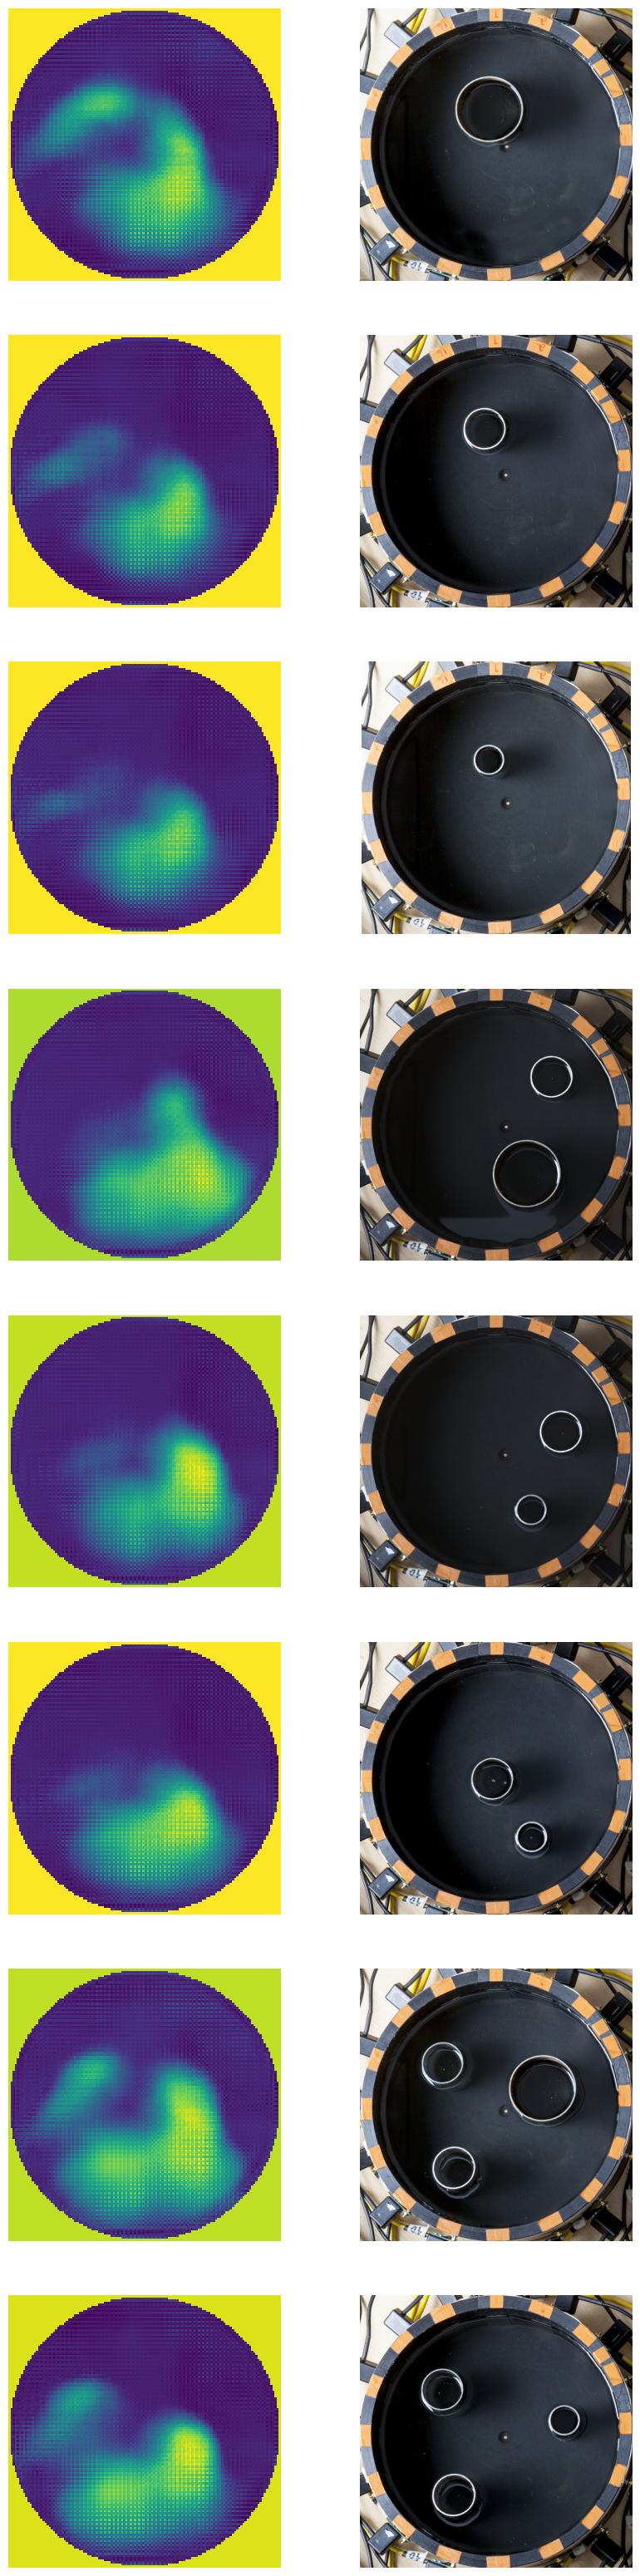

In [ ]:
'Plot'
# plt.figure(figsize=(10, 40))
fig, ax = plt.subplots(result.shape[0],2,figsize=(10,40))
for k in range(result.shape[0]):
  ax[k][0].imshow(result[k], interpolation='none')
  ax[k][0].set_axis_off()
  ax[k][1].imshow(photo_array[k])
  ax[k][1].set_axis_off()
plt.show()
#plt.subplot(4,4,2)
#img = np.asarray(Image.open('fantom_' + exper[test] + '.jpg'))
#plt.imshow(img)
#plt.imshow(label_val[example], interpolation='none')

In [ ]:
'Plot (all pictures)'



'Plot (all pictures)'